In [1]:
%matplotlib inline
import numpy as np
from distfit import distfit
import pandas as pd
import matplotlib.pyplot as plt
import time
import math

from scipy import stats

import warnings
warnings.filterwarnings("ignore")


ksN = 100           # Kolmogorov-Smirnov KS test for goodness of fit: samples
ALPHA = 0.05        # significance level for hypothesis test

In [2]:
df = pd.read_csv("auction_2022.csv")
df.head()

,Name,Base,Sold,Team,Prev_team,Nationality,Role
0,ISHAN KISHAN,2.0,15.25,MI,MI,Indian,Wicket Keeper
1,DEEPAK CHAHAR,2.0,14.00,CSK,CSK,Indian,Bowler
2,SHREYAS IYER,2.0,12.25,KKR,DC,Indian,Batsman
3,LIAM LIVINGSTONE,1.0,11.50,PBKS,RR,Overseas,All-Rounder
4,SHARDUL THAKUR,2.0,10.75,DC,CSK,Indian,Bowler


In [3]:
X = df['Sold'][:204]
dist = distfit()
dist.fit_transform(X)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 1.5310564] [loc=2.704 scale=3.315]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.9613756] [loc=0.200 scale=2.504]
[distfit] >[pareto    ] [0.03 sec] [RSS: 0.4101349] [loc=-1.050 scale=1.250]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 0.8956446] [loc=0.200 scale=1.199]
[distfit] >[t         ] [0.02 sec] [RSS: 0.7190571] [loc=0.482 scale=0.515]
[distfit] >[genextreme] [0.18 sec] [RSS: 0.8679646] [loc=0.224 scale=0.132]
[distfit] >[gamma     ] [0.06 sec] [RSS: 0.2874139] [loc=0.200 scale=3.352]
[distfit] >[lognorm   ] [0.11 sec] [RSS: 0.9366827] [loc=0.200 scale=0.203]
[distfit] >[beta      ] [0.10 sec] [RSS: 1.0446992] [loc=0.200 scale=19.683]
[distfit] >[uniform   ] [0.0 sec] [RSS: 1.6532981] [loc=0.200 scale=15.050]
[distfit] >[loggamma  ] [0.05 sec] [RSS: 1.5360474] [loc=-1091.219 scale=145.986]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.gamma_gen at 0x1504c4fb610>,
  'stats': 'RSS',
  'params': (0.3740107850594212, 0.19999999999999998, 3.3519481410433043),
  'name': 'gamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x1504c776d90>,
  'score': 0.287413944465403,
  'loc': 0.19999999999999998,
  'scale': 3.3519481410433043,
  'arg': (0.3740107850594212,),
  'CII_min_alpha': 0.2008131114786849,
  'CII_max_alpha': 5.53042171328839},
 'summary':          distr     score  LLE          loc       scale  \
 0        gamma  0.287414  NaN          0.2    3.351948   
 1       pareto  0.410135  NaN    -1.050484    1.250484   
 2            t  0.719057  NaN     0.481725    0.514743   
 3   genextreme  0.867965  NaN     0.223721    0.132326   
 4     dweibull  0.895645  NaN          0.2    1.199415   
 5      lognorm  0.936683  NaN          0.2    0.202999   
 6        expon  0.961376  NaN          0.2    2.504412   
 7         beta  1.044699  NaN          0.2    19

In [4]:
print(dist.summary)

         distr     score  LLE          loc       scale  \
0        gamma  0.287414  NaN          0.2    3.351948   
1       pareto  0.410135  NaN    -1.050484    1.250484   
2            t  0.719057  NaN     0.481725    0.514743   
3   genextreme  0.867965  NaN     0.223721    0.132326   
4     dweibull  0.895645  NaN          0.2    1.199415   
5      lognorm  0.936683  NaN          0.2    0.202999   
6        expon  0.961376  NaN          0.2    2.504412   
7         beta  1.044699  NaN          0.2    19.68293   
8         norm  1.531056  NaN     2.704412    3.315047   
9     loggamma  1.536047  NaN -1091.219168  145.985706   
10     uniform  1.653298  NaN          0.2       15.05   

                                        arg  
0                     (0.3740107850594212,)  
1                     (1.2961365596015777,)  
2                     (0.6686582284417252,)  
3                     (-5.578283116824423,)  
4                    (0.42423452017393487,)  
5                      (7.0

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\ngamma\na=0.374011, loc=0.2, scale=3.35195'}, xlabel='Values', ylabel='Frequency'>)

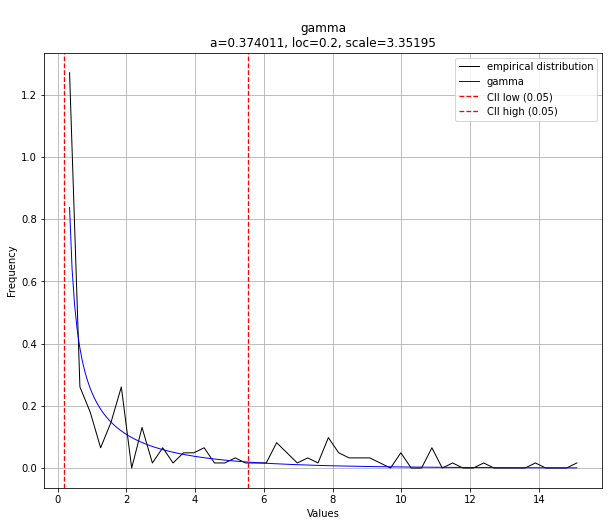

In [5]:
# Plot results
dist.plot()

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: gamma'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

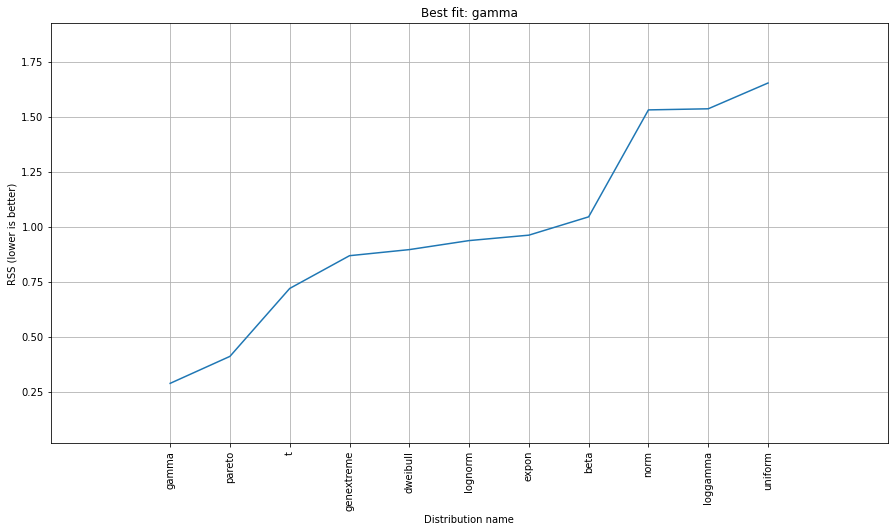

In [6]:
dist.plot_summary()

In [7]:
df_pre = pd.read_csv("auction_pre2022.csv")
df_pre.head()

,Player,Role,Team,Year,Player Origin,Amt,Amt_inf
0,Abhishek Nayar,All-Rounder,Pune Warriors India,2013,Indian,5.0625,7.7478
1,Ajantha Mendis,Bowler,Pune Warriors India,2013,Overseas,5.4375,8.3217
2,Akila Dananjaya,All-Rounder,Chennai Super Kings,2013,Overseas,0.1500,0.2296
3,Ben Laughlin,Bowler,Chennai Super Kings,2013,Overseas,0.1500,0.2296
4,Christopher Barnwell,All-Rounder,Royal Challengers Bangalore,2013,Overseas,0.3750,0.5739


In [9]:
X_train = df_pre['Amt_inf']

In [10]:
from scipy.stats import gamma
gamma.fit(X_train)

(0.47071423971890114, 0.12739999999999999, 3.977978533842977)